In [1]:
#Data
import pandas as pd
import numpy as np
import os
import pickle

#Plot
import matplotlib.pyplot as plt

#Model
from pysr import PySRRegressor, TemplateExpressionSpec
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [6]:
# Load the pickled DataFrames
with open('data/X_train_all.pkl', 'rb') as f:
    X_train = pickle.load(f)

with open('data/X_test_all.pkl', 'rb') as f:
    X_test = pickle.load(f)

with open('data/y_train_all.pkl', 'rb') as f:
    y_train = pickle.load(f)

with open('data/y_test_all.pkl', 'rb') as f:
    y_test = pickle.load(f)

In [ ]:
# # Load the pickled DataFrames 2 (removed glyxerol-methanol)
# with open('data/X_train_all_2.pkl', 'rb') as f:
#     X_train = pickle.load(f)

# with open('data/X_test_all_2.pkl', 'rb') as f:
#     X_test = pickle.load(f)

# with open('data/y_train_all_2.pkl', 'rb') as f:
#     y_train = pickle.load(f)

# with open('data/y_test_all_2.pkl', 'rb') as f:
#     y_test = pickle.load(f)

In [5]:
# # Overwrite with rearranged data
# with open('data/df_filtered_rearranged.pkl', 'rb') as f:
#     df = pickle.load(f)

# df['mix'] = df['compA'] + df['compB']
# mixtures = df['mix'].unique()

# train_mix, test_mix = train_test_split(mixtures, test_size=0.3, random_state=42)

# df = df[df['P'] != 77000]
# X_columns = ['mA', 'mB', 'KA', 'KB', 'XA', 'XB', 'Tr_A', 'Tr_B', 'Tr_mix', 'mAKA', 'mBKB', 'KAKB']
# X = df[X_columns]
# y = df['K']

# train_df = df[df['mix'].isin(train_mix)]
# test_df = df[df['mix'].isin(test_mix)]

# X_train = train_df[X_columns]
# y_train = train_df['K']
# X_test = test_df[X_columns]
# y_test = test_df['K']

In [ ]:
# Path to the 'logs' folder
path_ref = 'logs'

# Get a list of folder names inside the 'logs' folder
folder_names_ref = os.listdir(path_ref)

runtotal = len(folder_names_ref) - 1
red_runs = 11

In [8]:
# Path to the 'outputs' folder
path = 'outputs'

# Get a list of folder names inside the 'outputs' folder
folder_names = [os.path.join(path,f).replace('\\', '/') for f in os.listdir(path) if os.path.isdir(os.path.join(path, f))]
folder_names = folder_names[-111:]

# Print the list of folder names
print(folder_names)

['outputs/20250224_150413_Q09a3R', 'outputs/20250225_092344_uhGrSL', 'outputs/20250225_093054_5fzmeR', 'outputs/20250225_094626_w4YPZC', 'outputs/20250225_095256_1yzPm5', 'outputs/20250225_095914_tGi7v8', 'outputs/20250225_103759_fCoAnA', 'outputs/20250225_110624_JHIPsg', 'outputs/20250225_114549_u9koMt', 'outputs/20250225_154253_CKtbDR', 'outputs/20250226_092531_VxNxk5', 'outputs/20250226_094606_DSnwko', 'outputs/20250226_110234_rRDl5q', 'outputs/20250226_112025_um180U', 'outputs/20250226_115404_y91ug2', 'outputs/20250226_130714_htUlZg', 'outputs/20250226_134544_AxUWEP', 'outputs/20250226_141525_MoNYLl', 'outputs/20250226_160525_GL4IDK', 'outputs/20250226_170904_xH2oV1', 'outputs/20250227_091852_8AXgNO', 'outputs/20250227_091946_FAXOlu', 'outputs/20250227_102453_nfYt6t', 'outputs/20250227_112416_gHfyx2', 'outputs/20250227_142020_GGtHKQ', 'outputs/20250227_171050_t6LciA', 'outputs/20250228_151248_UTps8T', 'outputs/20250303_100057_CjrXfl', 'outputs/20250303_104859_YNrxsO', 'outputs/2025

In [9]:
len(folder_names)

111

In [62]:
equations = []
errors = []
r2_scores = []
failed_folders = []  # To keep track of folders that fail to load or produce predictions
error_messages = []  # To store error messages

for folder in folder_names:
    try:
        # Attempt to load the model from the specified folder
        model = PySRRegressor.from_file(run_directory=folder)
        
        # If the model is loaded, perform the calculations
        best_equation = model.get_best().equation
        equations.append(best_equation)
        
        y_pred = model.predict(X_test)
        
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        errors.append(rmse)
        
        r2 = r2_score(y_test, y_pred)
        r2_scores.append(r2)
    
    except Exception as e:
        # If an error occurs, store the folder and the error message
        failed_folders.append(folder)
        error_message = str(e)
        error_messages.append(error_message)
        
        # Append custom message based on the error
        if "Ran out of input" in error_message:
            equations.append("Ran out of input")
        else:
            equations.append("Run failed")
        
        # Append default values when the process fails
        errors.append(1)
        r2_scores.append(0)


Attempting to load model from outputs\20250224_150413_Q09a3R\checkpoint.pkl...


Attempting to load model from outputs\20250225_092344_uhGrSL\checkpoint.pkl...
Attempting to load model from outputs\20250225_093054_5fzmeR\checkpoint.pkl...
Attempting to load model from outputs\20250225_094626_w4YPZC\checkpoint.pkl...
Attempting to load model from outputs\20250225_095256_1yzPm5\checkpoint.pkl...
Attempting to load model from outputs\20250225_095914_tGi7v8\checkpoint.pkl...
Attempting to load model from outputs\20250225_103759_fCoAnA\checkpoint.pkl...
Attempting to load model from outputs\20250225_110624_JHIPsg\checkpoint.pkl...
Attempting to load model from outputs\20250225_114549_u9koMt\checkpoint.pkl...
Attempting to load model from outputs\20250225_154253_CKtbDR\checkpoint.pkl...
Attempting to load model from outputs\20250226_092531_VxNxk5\checkpoint.pkl...
Attempting to load model from outputs\20250226_094606_DSnwko\checkpoint.pkl...
Attempting to load model from outputs\20250226_110234_rRDl5q\checkpoint.pkl...
Attempting to load model from outputs\20250226_11202

In [63]:
error_messages

["'NoneType' object has no attribute 'set_params'",
 'Ran out of input',
 "Couldn't find equation file! The equation search likely exited before a single iteration completed.",
 "Couldn't find equation file! The equation search likely exited before a single iteration completed.",
 "Failed to evaluate the expression. If you are using a custom operator, make sure to define it in `extra_sympy_mappings`, e.g., `model.set_params(extra_sympy_mappings={'inv': lambda x: 1/x})`, where `lambda x: 1/x` is a valid SymPy function defining the operator. You can then run `model.refresh()` to re-load the expressions.",
 "Couldn't find equation file! The equation search likely exited before a single iteration completed.",
 "Failed to evaluate the expression. If you are using a custom operator, make sure to define it in `extra_sympy_mappings`, e.g., `model.set_params(extra_sympy_mappings={'inv': lambda x: 1/x})`, where `lambda x: 1/x` is a valid SymPy function defining the operator. You can then run `mo

In [64]:
def remove_consecutive_runs_failed(lst):
    # Initialize a new list to store the result
    result = []
    
    # Iterate through the original list
    for i in range(len(lst)):
        # If the current element is "Run failed" and it's the same as the previous one, skip it
        if lst[i] == "Run failed" and (i == 0 or lst[i] != lst[i - 1]):
            result.append(lst[i])
        elif lst[i] != "Run failed":
            result.append(lst[i])
    
    return result

equations = remove_consecutive_runs_failed(equations)

In [65]:
equations = equations[:-(red_runs+2)]
errors = errors[:-(red_runs+2)]
r2_scores = r2_scores[:-(red_runs+2)]

In [66]:
# # After processing, print or log the failed folders and errors
# for folder, error in zip(failed_folders, error_messages):
#     print(f"Folder {folder} failed with error: {error}")

In [67]:
for i,e in enumerate(equations):
    if i > 17:
        if i < 67:
            print(f"Equation {i+2}: {e}")
        elif i > 67:
            print(f"Equation {i+1}: {e}")

Equation 20: (mB * (KB + (mA * -0.011838678))) + (mA * KA)
Equation 21: KB / (mB + (mA / ((mB * -0.05393015) + (KA / KB))))
Equation 22: Run failed
Equation 23: (KB * (mB - 0.009019405)) + (KA * mA)
Equation 24: (mA + (KB * ((mB / KA) - ((mB * (mA / 0.16069566)) * KB)))) * KA
Equation 25: KB + (((KA - KB) + (KB * (mB * ((KB + -0.12711246) * -3.3513155)))) * mA)
Equation 26: (KB * mB) + ((KA + ((KB * (mB * (KB + -0.12713353))) / -0.2982252)) * mA)
Equation 27: (KB * mB) + (mA * (KA + ((KB * ((0.12713754 - KB) / 0.29814035)) * mB)))
Equation 28: KA + (((KB - ((mA * (KB / 0.2982829)) * (KB + -0.12712336))) - KA) * mB)
Equation 29: ((((((mB / (((-0.16662833 / KB) + (T / Tc_B)) / -0.0557898)) - KB) * ((mA / 1.0497664) * KB)) + KB) - KA) * mB) + KA
Equation 30: (KB * (mB - ((KB * (KB * (mA * 22.82901))) * (KB * mB)))) + (KA * mA)
Equation 31: ((((KB * (mB * (0.12713352 - KB))) / 0.29825068) + (KA - KB)) * mA) + KB
Equation 32: KA + (((((0.12501837 - KB) * mA) * exp(0.024020867 / (KB + -0.217

In [68]:
for i, e in enumerate(errors):
    if i > 17 and e!=1:
        print(f"Run {i+1}: {e}")

Run 19: 0.0039007548523994455
Run 20: 0.003420231765120411
Run 22: 0.004174250754390664
Run 23: 0.004025485818488079
Run 24: 0.004523555465575889
Run 25: 0.004524135239047986
Run 26: 0.004524403492898175
Run 27: 0.004523920149439088
Run 28: 0.0040098050603113635
Run 29: 0.004181077060082236
Run 30: 0.004524059994669835
Run 31: 0.004015878835988237
Run 32: 0.0043823824887990245
Run 33: 0.0039780735189890075
Run 34: 0.004254887965322725
Run 35: 0.004181072850325294
Run 36: 0.004145251263408543
Run 37: 0.004364838445350826
Run 38: 0.005136575172126297
Run 39: 0.004255842466664781
Run 40: 0.0037122190254172877
Run 41: 0.00419717034593749
Run 42: 0.003976936657917645
Run 43: 0.0037833196957122177
Run 44: 0.0041691295368250355
Run 45: 0.00410294218317683
Run 46: 0.004569522145331827
Run 47: 0.004043375896495159
Run 48: 0.003975990815917152
Run 49: 0.004490694834177528
Run 50: 0.00380336417760073
Run 51: 0.004569522145331827
Run 52: 0.003951686315628612
Run 53: 0.00398662436087475
Run 54: 0.0

In [69]:
run_r2 = []
for i, e in enumerate(r2_scores):
    run_number = i + 1
    run_r2.append([run_number,e])
    if i > 17 and e != 0:
        print(f"Run {i+1}: {e}")

Run 19: 0.9701282186790631
Run 20: 0.9770345542779779
Run 22: 0.9657925362702076
Run 23: 0.9681873089023175
Run 24: 0.9598279822353467
Run 25: 0.9598176840692457
Run 26: 0.9598129187914833
Run 27: 0.9598215047300839
Run 28: 0.9684346706078932
Run 29: 0.9656805633426855
Run 30: 0.959819020664229
Run 31: 0.9683389722237242
Run 32: 0.9622962657579458
Run 33: 0.9689322775483935
Run 34: 0.9644581471089523
Run 35: 0.9656806324523488
Run 36: 0.9662661796951434
Run 37: 0.9625975411058434
Run 38: 0.9482022252137948
Run 39: 0.9644421990737801
Run 40: 0.9729460308222881
Run 41: 0.9654158586060195
Run 42: 0.9689500321912883
Run 43: 0.9718997690598001
Run 44: 0.965876420258722
Run 45: 0.966951283262139
Run 46: 0.9590074080703406
Run 47: 0.9679039164278587
Run 48: 0.9689647997743945
Run 49: 0.960409508485237
Run 50: 0.9716012234909728
Run 51: 0.9590074080703406
Run 52: 0.9693430650341902
Run 53: 0.9687985742906908
Run 54: 0.9692594815402916
Run 55: 0.9280537701466975
Run 56: 0.9710147607185527
Run 5

In [70]:
top10_r2 = sorted(run_r2, key=lambda x: x[1], reverse=True)[:10]
for i, e in top10_r2:
    print(f"Run {i+1}: {e}")

Run 21: 0.9770345542779779
Run 41: 0.9729460308222881
Run 80: 0.9722751388785931
Run 75: 0.9722750533779442
Run 79: 0.9721345406263489
Run 89: 0.9719357938011799
Run 86: 0.9719139452484685
Run 85: 0.9719132829712012
Run 84: 0.9719132066561907
Run 87: 0.9719128462160234


Attempting to load model from outputs\20250326_100204_SEc6Qt\checkpoint.pkl...


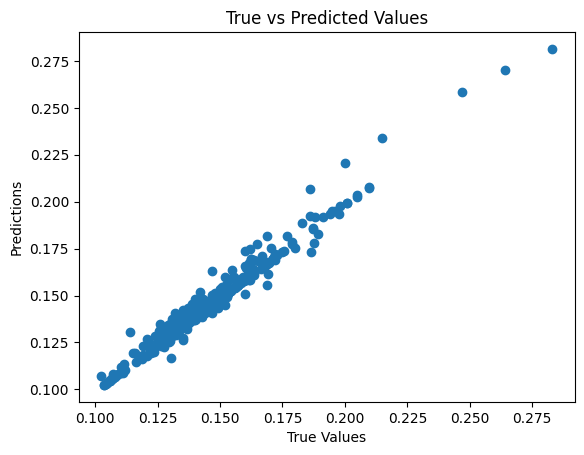

In [74]:
folder_index = (1 + 96) #Change the last value to run number
model = PySRRegressor.from_file(run_directory=folder_names[folder_index])

# If the model is loaded, perform the calculations
model.get_best().equation
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.show()

In [ ]:
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

RMSE: 0.0052084855319455715
R2 Score: 0.9467417697703567


MIXING RULES

Filippov and Novoselova

K = [0.72 * mB^2 + mB(1-0.72)](KB-KA) + KA 

In [3]:
C = 0.72
y_pred = (C*X_test['mB']*X_test['mB'] + X_test['mB']*(1-C))*(X_test['KB']-X_test['KA'])+X_test['KA']
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

RMSE: 0.0068869790550220855
R2 Score: 0.9068846390955716


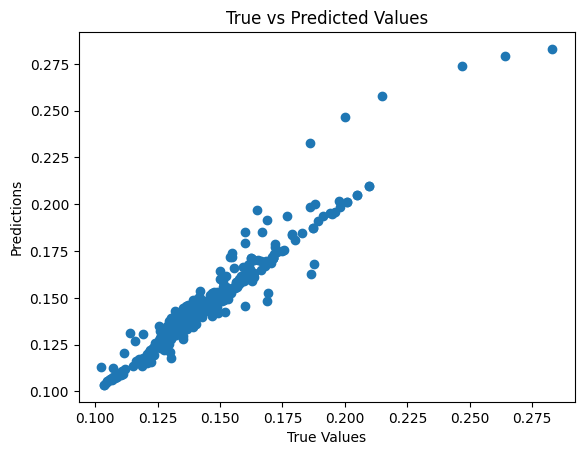

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.show()

Filippov and Novoselova

K = KAmA + KBmB - 0.72*|KA - KB|mAmB
C = 0.72

In [7]:
y_pred = X_test['KA']*X_test['mA'] + X_test['KB']*X_test['mB'] - 0.72*abs(X_test['KA'] - X_test['KB'])*X_test['mA']*X_test['mB']
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

RMSE: 0.0036659282853736463
R2 Score: 0.9736165408115629


In [ ]:
y_pred = X_train['KA']*X_train['mA'] + X_train['KB']*X_train['mB'] - 0.72*abs(X_train['KA'] - X_train['KB'])*X_train['mA']*X_train['mB']
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
r2 = r2_score(y_train, y_pred)
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

RMSE: 0.0063821617443430585
R2 Score: 0.9574760431126669


Filippov and Novoselova (Optimized C)

K = KAmA + KBmB - 0.5*|KA - KB|mAmB
C = 0.5

In [8]:
y_pred = X_test['KA']*X_test['mA'] + X_test['KB']*X_test['mB'] - 0.5*abs(X_test['KA'] - X_test['KB'])*X_test['mA']*X_test['mB']
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

RMSE: 0.0034621741272037334
R2 Score: 0.9764678493707055


Jamieson and Irving 

In [ ]:
def calc_K(df):
    if df['KA'] > df['KB']:
        return df['KA'] * df['mA'] + df['KB'] * df['mB'] - (df['KA'] - df['KB']) * df['mA'] * (1 - np.sqrt(df['mA']))
    else:
        return df['KA'] * df['mA'] + df['KB'] * df['mB'] - (df['KB'] - df['KA']) * df['mB'] * (1 - np.sqrt(df['mB']))

y_pred = X_test.apply(calc_K, axis=1)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

RMSE: 0.0035731431965348565
R2 Score: 0.9749351766028503


Vredeveld (1973)

In [ ]:
def calc_K_vre(df):
    if df['mA'] == 0:
        return df['KB']
    elif df['mB'] == 0:
        return df['KA']
    else:
        return (df['mA']*(df['KA']**-2))**-0.5 + (df['mB']*(df['KB']**-2))**-0.5

y_pred = y_pred = X_test.apply(calc_K_vre, axis=1)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

RMSE: 0.2900523552979
R2 Score: -164.16445905313628


Alexey Melkikh & Pavel Skripov

In [ ]:
y_pred = 2*(X_test['KA'] * X_test['mA'] 
            + X_test['KB'] * X_test['mB'] 
            - ((X_test['KA'] * X_test['KB']) / (X_test['mA']*X_test['KB'] + X_test['mB']*X_test['KA']))
            )/(X_test['mA'] + X_test['mB'])

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

RMSE: 0.14553960824399498
R2 Score: -40.583994972286234


Frenkel

In [ ]:
y_pred = np.exp((X_test['XA']**2) * np.log(X_test['KA']) + 
                (X_test['XB']**2) * np.log(X_test['KB']) + 
                2 * X_test['XA'] * X_test['XB'] * np.log((X_test['KA'] + X_test['KB']) / 2))

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

RMSE: 0.015068902254451195
R2 Score: 0.5542133709274832


MISC

In [ ]:
with open('data/df_filtered.pkl', 'rb') as f:
    df_filtered = pickle.load(f)

In [ ]:
df_filtered

,compA,compB,XA,XB,T,P,K,mA,mB,CAS_A,...,KB,mix,Tc_A,Tc_B,Tr_A,Tr_B,Tr_mix,mAKA,mBKB,KAKB
0,"1,1'-oxybis(2-methoxyethane)",dodecane,0.000,1.000,298.15,101325.0,0.136,0.000000,1.000000,111-96-6,...,0.1360,"1,1'-oxybis(2-methoxyethane)dodecane",569.71,658.0,0.523336,0.453116,0.453116,0.000000,0.136000,0.020917
1,"1,1'-oxybis(2-methoxyethane)",dodecane,0.093,0.907,298.15,101325.0,0.1363,0.074732,0.925268,111-96-6,...,0.1360,"1,1'-oxybis(2-methoxyethane)dodecane",569.71,658.0,0.523336,0.453116,0.459646,0.011494,0.125837,0.020917
2,"1,1'-oxybis(2-methoxyethane)",dodecane,0.147,0.853,298.15,101325.0,0.1359,0.119522,0.880478,111-96-6,...,0.1360,"1,1'-oxybis(2-methoxyethane)dodecane",569.71,658.0,0.523336,0.453116,0.463438,0.018382,0.119745,0.020917
3,"1,1'-oxybis(2-methoxyethane)",dodecane,0.296,0.704,298.15,101325.0,0.1363,0.248794,0.751206,111-96-6,...,0.1360,"1,1'-oxybis(2-methoxyethane)dodecane",569.71,658.0,0.523336,0.453116,0.473901,0.038264,0.102164,0.020917
4,"1,1'-oxybis(2-methoxyethane)",dodecane,0.420,0.580,298.15,101325.0,0.138,0.363221,0.636779,111-96-6,...,0.1360,"1,1'-oxybis(2-methoxyethane)dodecane",569.71,658.0,0.523336,0.453116,0.482608,0.055863,0.086602,0.020917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,undecane,hexadecane,0.575,0.425,313.15,101325.0,0.1382,0.482913,0.517087,1120-21-4,...,0.1451,undecanehexadecane,639.00,723.0,0.490063,0.433126,0.465864,0.064469,0.075029,0.019371
5,undecane,hexadecane,0.656,0.344,313.15,101325.0,0.1376,0.568287,0.431713,1120-21-4,...,0.1451,undecanehexadecane,639.00,723.0,0.490063,0.433126,0.470476,0.075866,0.062642,0.019371
6,undecane,hexadecane,0.786,0.214,313.15,101325.0,0.136,0.717141,0.282859,1120-21-4,...,0.1451,undecanehexadecane,639.00,723.0,0.490063,0.433126,0.477878,0.095738,0.041043,0.019371
7,undecane,hexadecane,0.905,0.095,313.15,101325.0,0.1346,0.868001,0.131999,1120-21-4,...,0.1451,undecanehexadecane,639.00,723.0,0.490063,0.433126,0.484654,0.115878,0.019153,0.019371


In [ ]:
# Condition where KB > KA
swap_mask = df_filtered['KB'] > df_filtered['KA']

# Swap values where condition is met
df_filtered.loc[swap_mask, ['KA', 'KB']] = df_filtered.loc[swap_mask, ['KB', 'KA']].values
df_filtered.loc[swap_mask, ['mA', 'mB']] = df_filtered.loc[swap_mask, ['mB', 'mA']].values
df_filtered.loc[swap_mask, ['XA', 'XB']] = df_filtered.loc[swap_mask, ['XB', 'XA']].values
df_filtered.loc[swap_mask, ['Tr_A', 'Tr_B']] = df_filtered.loc[swap_mask, ['Tr_B', 'Tr_A']].values
df_filtered.loc[swap_mask, ['MW_A', 'MW_B']] = df_filtered.loc[swap_mask, ['MW_B', 'MW_A']].values
df_filtered.loc[swap_mask, ['CAS_A', 'CAS_B']] = df_filtered.loc[swap_mask, ['CAS_B', 'CAS_A']].values
df_filtered.loc[swap_mask, ['SMILES_A', 'SMILES_B']] = df_filtered.loc[swap_mask, ['SMILES_B', 'SMILES_A']].values

In [ ]:
df_filtered

,compA,compB,XA,XB,T,P,K,mA,mB,CAS_A,...,KB,mix,Tc_A,Tc_B,Tr_A,Tr_B,Tr_mix,mAKA,mBKB,KAKB
0,"1,1'-oxybis(2-methoxyethane)",dodecane,0.000,1.000,298.15,101325.0,0.136,0.000000,1.000000,111-96-6,...,0.1360,"1,1'-oxybis(2-methoxyethane)dodecane",569.71,658.0,0.523336,0.453116,0.453116,0.000000,0.136000,0.020917
1,"1,1'-oxybis(2-methoxyethane)",dodecane,0.093,0.907,298.15,101325.0,0.1363,0.074732,0.925268,111-96-6,...,0.1360,"1,1'-oxybis(2-methoxyethane)dodecane",569.71,658.0,0.523336,0.453116,0.459646,0.011494,0.125837,0.020917
2,"1,1'-oxybis(2-methoxyethane)",dodecane,0.147,0.853,298.15,101325.0,0.1359,0.119522,0.880478,111-96-6,...,0.1360,"1,1'-oxybis(2-methoxyethane)dodecane",569.71,658.0,0.523336,0.453116,0.463438,0.018382,0.119745,0.020917
3,"1,1'-oxybis(2-methoxyethane)",dodecane,0.296,0.704,298.15,101325.0,0.1363,0.248794,0.751206,111-96-6,...,0.1360,"1,1'-oxybis(2-methoxyethane)dodecane",569.71,658.0,0.523336,0.453116,0.473901,0.038264,0.102164,0.020917
4,"1,1'-oxybis(2-methoxyethane)",dodecane,0.420,0.580,298.15,101325.0,0.138,0.363221,0.636779,111-96-6,...,0.1360,"1,1'-oxybis(2-methoxyethane)dodecane",569.71,658.0,0.523336,0.453116,0.482608,0.055863,0.086602,0.020917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,undecane,hexadecane,0.425,0.575,313.15,101325.0,0.1382,0.517087,0.482913,544-76-3,...,0.1335,undecanehexadecane,639.00,723.0,0.433126,0.490063,0.465864,0.064469,0.075029,0.019371
5,undecane,hexadecane,0.344,0.656,313.15,101325.0,0.1376,0.431713,0.568287,544-76-3,...,0.1335,undecanehexadecane,639.00,723.0,0.433126,0.490063,0.470476,0.075866,0.062642,0.019371
6,undecane,hexadecane,0.214,0.786,313.15,101325.0,0.136,0.282859,0.717141,544-76-3,...,0.1335,undecanehexadecane,639.00,723.0,0.433126,0.490063,0.477878,0.095738,0.041043,0.019371
7,undecane,hexadecane,0.095,0.905,313.15,101325.0,0.1346,0.131999,0.868001,544-76-3,...,0.1335,undecanehexadecane,639.00,723.0,0.433126,0.490063,0.484654,0.115878,0.019153,0.019371


In [ ]:
from sklearn.linear_model import LinearRegression

B = ((X_train['KA']**2)*(X_train['KB']**2)*(X_train['mA']**2)*(X_train['mB']**2)).values.reshape(-1, 1)
K = y_train.values

model_lin = LinearRegression()
model_lin.fit(B,K)

# Get the slope (coefficient) and intercept
slope = model_lin.coef_[0]  # Since there is only one feature, extract the first coefficient
intercept = model_lin.intercept_

# Print results
print(f"Optimal x (slope): {slope:.4f}")
print(f"Intercept: {intercept:.4f}")

# R-squared value (how well the model fits)
r2 = model_lin.score(B, K)
print(f"R-squared: {r2:.4f}")

Optimal x (slope): 316.9078
Intercept: 0.1393
R-squared: 0.1828


In [ ]:
y_pred = X_test['mA']*X_test['KA'] + X_test['mB']*X_test['KB'] + 210*(X_test['KA']**2)*(X_test['KB']**2)*(X_test['mA']**2)*(X_test['mB']**2)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

RMSE: 0.008010634289866701
R2 Score: 0.8740211565134011


In [ ]:
y_pred = X_test['mA']*X_test['KA'] + X_test['mB']*X_test['KB'] - 0.5*(X_test['KA'])*(X_test['KB'])*(X_test['mA'])*(X_test['mB'])
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

RMSE: 0.0038411414399542407
R2 Score: 0.9710342748835846


In [ ]:
y_pred = X_test['mA']*X_test['KA'] + X_test['mB']*X_test['KB'] - 30.28438*(X_test['KA']**2)*(X_test['KB']**2)*(X_test['mA'])*(X_test['mB'])
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

RMSE: 0.0037742947579496896
R2 Score: 0.9720336728145353


In [ ]:
df_filtered['K_reduced'] = df_filtered['K'] - df_filtered['mAKA'] - df_filtered['mBKB']

In [ ]:
df_filtered

,compA,compB,XA,XB,T,P,K,mA,mB,CAS_A,...,mix,Tc_A,Tc_B,Tr_A,Tr_B,Tr_mix,mAKA,mBKB,KAKB,K_reduced
0,"1,1'-oxybis(2-methoxyethane)",dodecane,0.000,1.000,298.15,101325.0,0.136,0.000000,1.000000,111-96-6,...,"1,1'-oxybis(2-methoxyethane)dodecane",569.71,658.0,0.523336,0.453116,0.453116,0.000000,0.136000,0.020917,0.0
1,"1,1'-oxybis(2-methoxyethane)",dodecane,0.093,0.907,298.15,101325.0,0.1363,0.074732,0.925268,111-96-6,...,"1,1'-oxybis(2-methoxyethane)dodecane",569.71,658.0,0.523336,0.453116,0.459646,0.011494,0.125837,0.020917,-0.00103
2,"1,1'-oxybis(2-methoxyethane)",dodecane,0.147,0.853,298.15,101325.0,0.1359,0.119522,0.880478,111-96-6,...,"1,1'-oxybis(2-methoxyethane)dodecane",569.71,658.0,0.523336,0.453116,0.463438,0.018382,0.119745,0.020917,-0.002227
3,"1,1'-oxybis(2-methoxyethane)",dodecane,0.296,0.704,298.15,101325.0,0.1363,0.248794,0.751206,111-96-6,...,"1,1'-oxybis(2-methoxyethane)dodecane",569.71,658.0,0.523336,0.453116,0.473901,0.038264,0.102164,0.020917,-0.004129
4,"1,1'-oxybis(2-methoxyethane)",dodecane,0.420,0.580,298.15,101325.0,0.138,0.363221,0.636779,111-96-6,...,"1,1'-oxybis(2-methoxyethane)dodecane",569.71,658.0,0.523336,0.453116,0.482608,0.055863,0.086602,0.020917,-0.004465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,undecane,hexadecane,0.425,0.575,313.15,101325.0,0.1382,0.517087,0.482913,544-76-3,...,undecanehexadecane,639.00,723.0,0.433126,0.490063,0.465864,0.064469,0.075029,0.019371,-0.001298
5,undecane,hexadecane,0.344,0.656,313.15,101325.0,0.1376,0.431713,0.568287,544-76-3,...,undecanehexadecane,639.00,723.0,0.433126,0.490063,0.470476,0.075866,0.062642,0.019371,-0.000908
6,undecane,hexadecane,0.214,0.786,313.15,101325.0,0.136,0.282859,0.717141,544-76-3,...,undecanehexadecane,639.00,723.0,0.433126,0.490063,0.477878,0.095738,0.041043,0.019371,-0.000781
7,undecane,hexadecane,0.095,0.905,313.15,101325.0,0.1346,0.131999,0.868001,544-76-3,...,undecanehexadecane,639.00,723.0,0.433126,0.490063,0.484654,0.115878,0.019153,0.019371,-0.000431


In [ ]:
with open('data/df_filtered_reduced.pkl', 'wb') as f:
    pickle.dump(df_filtered, f)